In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import tensorflow as tf

In [5]:
def tensor(tf_run):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print(sess.run(tf_run))

In [6]:
x = tf.Variable([[0.4, 0.2, 0.4]])
w = tf.Variable([[-0.5, -0.2], [-0.3, 0.4], [-0.5, 0.2]])
b = tf.Variable([[0.1, 0.2]])

In [7]:
tensor(tf.matmul(x, w) + b)
tensor(tf.nn.relu(tf.matmul(x, w) + b))

[[-0.35999998  0.28      ]]
[[0.   0.28]]


In [8]:
tensor(tf.matmul(x, w) + b)
tensor(tf.nn.sigmoid(tf.matmul(x, w) + b))

[[-0.35999998  0.28      ]]
[[0.41095957 0.5695462 ]]


In [9]:
w = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
x = tf.Variable([[0.4, 0.2, 0.4]])
y = tf.nn.relu(tf.matmul(x, w) + b)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    (_b, _w, _y) = sess.run((b, w, y))
    print('b', _b)
    print('w', _w)
    print('y', _y)

b [[ 0.22331442 -0.22237805]]
w [[1.4712597  1.3490782 ]
 [0.0123896  1.1480132 ]
 [1.0491321  0.34227476]]
y [[1.2339491  0.68376577]]


(array([ 24.,  65., 140., 253., 246., 179.,  74.,  17.,   1.,   1.]),
 array([-2.7710319e+00, -2.0790129e+00, -1.3869938e+00, -6.9497478e-01,
        -2.9557229e-03,  6.8906331e-01,  1.3810823e+00,  2.0731013e+00,
         2.7651205e+00,  3.4571395e+00,  4.1491585e+00], dtype=float32),
 <a list of 10 Patch objects>)

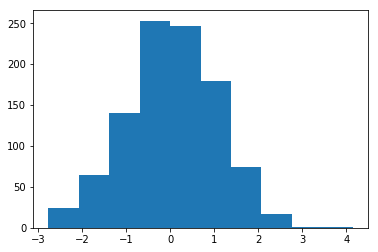

In [10]:
ts_norm = tf.random_normal([1000])
with tf.Session() as sess:
    norm_data = ts_norm.eval()
plt.hist(norm_data)

In [11]:
w = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
x = tf.placeholder('float', [None, 3])
y = tf.nn.relu(tf.matmul(x, w) + b)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_array = np.array([[0.4, 0.2, 0.4]])
    (_b, _w, _x, _y) = sess.run((b, w, x, y), feed_dict={x: x_array})
    print('b', _b)
    print('w', _w)
    print('x', _x)
    print('y', _y)

b [[ 0.61453575 -0.38794178]]
w [[-0.3051256  -0.01145133]
 [-0.61085373 -1.0193056 ]
 [ 0.8989966   0.11879448]]
x [[0.4 0.2 0.4]]
y [[0.7299134 0.       ]]


In [12]:
w = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
x = tf.placeholder('float', [None, 3])
y = tf.nn.relu(tf.matmul(x, w) + b)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_array = np.array([[0.4, 0.2, 0.4], [0.3, 0.4, 0.5], [0.3, -0.4, 0.5]])
    (_b, _w, _x, _y) = sess.run((b, w, x, y), feed_dict={x: x_array})
    print('b', _b)
    print('w', _w)
    print('x', _x)
    print('y', _y)

b [[ 0.45689255 -0.40107608]]
w [[ 0.9814545   0.38382658]
 [-0.07024652  1.0128111 ]
 [-0.0026022  -0.3501017 ]]
x [[ 0.4  0.2  0.4]
 [ 0.3  0.4  0.5]
 [ 0.3 -0.4  0.5]]
y [[0.8343842 0.       ]
 [0.7219292 0.       ]
 [0.7781264 0.       ]]


In [13]:
def layer(output_dim, input_dim, inputs, activation=None):
    w = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    xwb = tf.matmul(inputs, w) + b
    if activation is None:
        outputs = xwb
    else:
        outputs = activation(xwb)
    return outputs

In [14]:
x = tf.placeholder('float', [None, 4])
h = layer(output_dim=3, input_dim=4, inputs=x, activation=tf.nn.relu)
y = layer(output_dim=2, input_dim=3, inputs=h)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    (layer_x, layer_h, layer_y) = sess.run((x, h, y), feed_dict={x: x_array})
    print('x', layer_x)
    print('h', layer_h)
    print('y', layer_y)

x [[0.4 0.2 0.4 0.5]]
h [[0.         0.47724557 0.        ]]
y [[-2.5575814 -1.5937452]]


In [15]:
def layer_debug(output_dim, input_dim, inputs, activation=None):
    w = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    xwb = tf.matmul(inputs, w) + b
    if activation is None:
        outputs = xwb
    else:
        outputs = activation(xwb)
    return outputs, w, b

In [16]:
x = tf.placeholder('float', [None, 4])
h, w1, b1 = layer_debug(output_dim=3, input_dim=4, inputs=x, activation=tf.nn.relu)
y, w2, b2 = layer_debug(output_dim=2, input_dim=3, inputs=h)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    (layer_x, layer_h, layer_y, w1, b1, w2, b2) = sess.run((x, h, y, w1, b1, w2, b2), feed_dict={x: x_array})
    print('x', layer_x)
    print('w1', w1)
    print('b1', b1)
    print('h', layer_h)
    print('w2', w2)
    print('b1', b2)
    print('y', layer_y)

x [[0.4 0.2 0.4 0.5]]
w1 [[ 0.56479335  0.17774734  0.37167758]
 [-1.3447865   1.8802956   1.2098604 ]
 [ 0.11083107 -1.4501673   0.0308846 ]
 [-0.98695594 -1.3516685   1.8796177 ]]
b1 [[ 0.6990733  -0.69553846 -0.20992617]]
h [[0.20688778 0.         1.1328797 ]]
w2 [[ 0.4194119  -1.3557823 ]
 [-0.53353906  1.758609  ]
 [-0.05006111  0.17893101]]
b1 [[0.19953044 1.7045519 ]]
y [[0.22958842 1.6267645 ]]
